In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sales_add.csv to Sales_add.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Sales_add.csv']))
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [7]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [9]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [10]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

From the analysis of given data we can conclude that :

1.  22 rows and 5 Columns in the dataset.
2. No missing or null values in the given data set.

# **case study**

1. finding out Outliers in data

[Text(0.5, 1.0, 'Sales After digital add(in $)')]

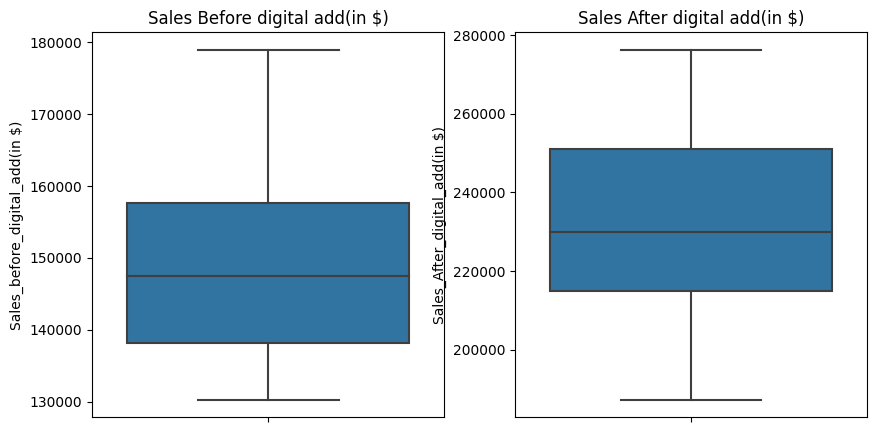

In [13]:
fig, (ax0,ax1) = plt.subplots(figsize = (10,5), nrows = 1, ncols = 2)

# Plotting and customizing the axes
sns.boxplot( y = "Sales_before_digital_add(in $)" , data = df, ax = ax0)
ax0.set(title = "Sales Before digital add(in $)")
sns.boxplot( y = "Sales_After_digital_add(in $)" , data = df, ax = ax1);
ax1.set(title = "Sales After digital add(in $)")

# There is no oulier in this data

# New Section

Procedure is divided in to 4 steps :
**STEP 1**

Define the Null and Alternate Hypothesis. and set the Significance level.

**Null Hypothesis** :
## **Ho** : Sales After Digital Advertising will be less than or equal to the sales before Digital Advertising.

Alternate Hypothesis :
# **Ha** : Sales After Digital Advertising will be Greater than the sales before usage of Digital Advertising.
The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.


**STEP 2**

Next we'll calculate the T-score and p value .

In [16]:
sales_before = df[["Sales_before_digital_add(in $)"]]

sales_after = df[["Sales_After_digital_add(in $)"]]

#  Conducting a 2 sample 1 tail T test:

t_score, p = stats.ttest_rel(sales_after, sales_before, alternative="greater")
print("The Test statistic scores are : \nt-score = %0.3f , p-value = %0.3f \n" % (t_score, p) )


The Test statistic scores are : 
t-score = 12.091 , p-value = 0.000 



Compare the calculated t-score with the critical value of t at 0.05 level of significance(i.e. t_critical = 1.682).

***TakE the absolute value of t_score as the features are taken arbitrarily ***

The Degree of Freedom is given by = n-1

i.e. The Degree of Freedom = 22-1 = 21

In [17]:
t_critical = 1.721 # t value for dof = 21 & alpha = 0.05

if t_score > t_critical:
    print("\nWe'll reject the Null Hypothesis\n\n")
elif t_score <= t_critical:
    print("\nWe fail to reject the Null Hypothesis\n")


We'll reject the Null Hypothesis




STEP 4 : Decide conclusions:

From Testing we can say the following about our Hypothesis:

As the calculated t-score > critical t-score value (i.e. at 5% or 0.05), We Reject the Null Hypothesis.
There is a significant increase in sales after doing Digital advertisements.

# **Checking whether there is any dependency between the features “Region” and “Manager”**

# **STEP 1**

We'll define the Null and Alternate Hypothesis. and set the Significance level.

Assume:

Null Hypothesis :
# **Ho : There is NO significant dependency between the Region and the Manager features.**

Alternate Hypothesis :
# **Ha : There is a significant amount of dependency between the Region and the Manager features.**

The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.
Prepping the required data

In [18]:
# Extracting the Required Features, performing a crosstab on them and assigning it to a new variable
data1 = pd.crosstab(df["Region"],df["Manager"])
data1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [20]:
stat, p, dof, expected = chi2_contingency(data1)

print(f"The Test chi-square value is :\t{stat:.3f}")
print(f"\nThe p-Value is :  \t{p:.3f}" )
print(f"\nThe Degree of freedom is : \t{dof}")

chi2_critical = 9.488 # the chi2 value at alpha = 0.05 and dof = 4

if stat > chi2_critical:
    print(f"We'll reject the Null Hypothesis")
elif stat < chi2_critical:
    print ("\n\nWe're unable to Reject the Null Hypothesis")

The Test chi-square value is :	3.051

The p-Value is :  	0.549

The Degree of freedom is : 	4


We're unable to Reject the Null Hypothesis


In this Testing we can say the following about our Hypothesis:

The calculated chi2 value < Critical chi2 value at 0.05 significance level and the calculated p-value > 0.05. We're Unable to reject Null Hypothesis.
Hence,we can conclude that there is no significant relationship between the Region and Manager features.

**Conclusion**: 
From the Study conducted by the Company can be Summerized as
1. There was a significant amount of increase in sales generated after the company started investing in Digital Marketing.
2. There isn't a significant dependency between the Regions and the Managers associated with the regions.

1. p-value greater than 0.05,so we cannot reject null hypothesis ie the variables region and manager are independent
2. No relationship between region and manager of company.
3. Critical value for degree of freedom=4 and level of significance = 0.05 is 9.488.
4. chi square statistic less than critical value,so we cannot reject null hypothesis.